In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def epsilon_similarity_graph(X: np.ndarray, sigma=None, epsilon=0):
    """ X (n x d): coordinates of the n data points in R^d.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    # Your code here
    W = np.array([np.sum((X[i] - X)**2, axis = 1) for i in range(X.shape[0])])
    typical_dist = np.mean(np.sqrt(W))
    # print(np.mean(W))
    c = 0.35
    if sigma == None:
        sigma = typical_dist * c
    
    mask = W >= epsilon
    
    adjacency = np.exp(- W / 2.0 / (sigma ** 2))
    adjacency[mask] = 0.0
    adjacency -= np.diag(np.diag(adjacency))
    return adjacency

def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    # Your code here
    d = np.sum(adjacency, axis = 1)
    d_sqrt = np.sqrt(d)  
#     print("d_sqrt {}".format(d_sqrt))
    D = np.diag(1 / d_sqrt)
    if normalize:
        L = np.eye(adjacency.shape[0]) - (adjacency.T / d_sqrt).T / d_sqrt
        # L = np.dot(np.dot(D, np.diag(d) - adjacency), D)
    else:
        L = np.diag(d) - adjacency
    return L

In [4]:
side_feature_u = np.load("side_feature_u.npy", allow_pickle=True)
side_feature_v = np.load("side_feature_v.npy", allow_pickle=True)

In [171]:
adjacency_u = epsilon_similarity_graph(side_feature_u,epsilon=1.1)
laplacian_u = compute_laplacian(adjacency_u,True)

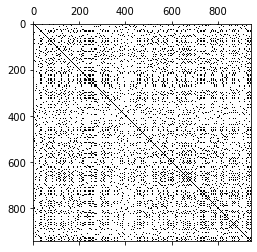

In [172]:
plt.spy(laplacian_u)
plt.show()

In [173]:
np.sum(laplacian_u)

16.055544084534837

In [174]:
a = side_feature_u.T.dot(laplacian_u).dot(side_feature_u)

In [175]:
np.sum(a)

4126.41792071063

In [147]:
adjacency_v = epsilon_similarity_graph(side_feature_v,epsilon=2.1)
laplacian_v = compute_laplacian(adjacency_v,True)

In [176]:
laplacian_v.shape

(1682, 1682)

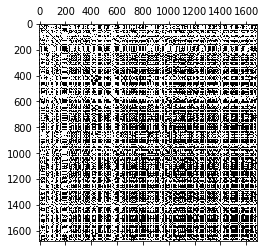

In [130]:
plt.spy(laplacian_v)
plt.show()

In [131]:
np.sum(laplacian_v)

175.2992371569325

In [132]:
b = side_feature_v.T.dot(laplacian_v).dot(side_feature_v)

In [133]:
np.sum(b)

2092.570831049698